In [1]:
import requests
import json
from csv import writer
import pandas as pd
import time

#GLOBAL VARIABLES
uniswapV2 = "0x7a250d5630b4cf539739df2c5dacb4c659f2488d"
uniswapV3 = "0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45"

# add token address here
addressLists = [
    "0xc7fb664d287a837981ad865faac66cdaf69fb262",
    "0x55ae69b64bc955381482a2c5b8fabf38531180d4",
    "0x8429d5b216d09f8c1765a3858ee5ecc2d77fa4cb",
    "0xaa866168a19cba0d4703711ffa0a3f474e47a9d2",
    "0xdc63269ea166b70d4780b3a11f5c825c2b761b01",   
]
wallets = []

for tokenAddress in addressLists:
    #print(tokenAddress)
    url = f"https://api.ethplorer.io/getTopTokenHolders/{tokenAddress}?apiKey=freekey&limit=100"
    holders = requests.get(url)
    holders = holders.json()
    holders = holders['holders']
    for holder in holders:
        wallets.append(holder['address'])

    time.sleep(1)

wallets = [*set(wallets)]

In [2]:
import requests

totalTransfers = {}

for wallet in wallets:
    url=f"https://api.etherscan.io/api?module=account&action=tokentx&address={wallet}&page=1&offset=100&startblock=0&endblock=99999999&sort=desc&apikey=7YRRHUFSDSM5BXCIM8FY3NPJ192WYKRC1G"

    resp=requests.get(url)
    resp=resp.json()
    resp=resp['result']

    yesterdayTime = int(resp[0]['timeStamp']) - 86400
    walletTransfers = []
    for transfer in resp:
        if int(transfer['timeStamp']) >= yesterdayTime: walletTransfers.append(transfer['timeStamp'])

    walletTransfers = [*set(walletTransfers)]
    totalTransfers[wallet] = len(walletTransfers)


In [3]:
totalTransfers

{'0x19e731bd5f7115e7966cc12aad97f808b5a5471a': 1,
 '0x949e335cf8ca0e27be5da3f6f213aa58a89d6a53': 13,
 '0x96da69cfa097d9951a11654e73a506d54532365f': 1,
 '0xdba68f07d1b7ca219f78ae8582c213d975c25caf': 8,
 '0xbb4cd466af4386b73685c76a1a84433d54d8419d': 3,
 '0x816dc6c5b0c994b0f6f8c4e2939c5fd493fa8219': 4,
 '0x2f47fbe30a119110282e2c6d1c3cad4d10e74135': 19,
 '0x8058aaea0d222086095b03860aad33fdc4890bc0': 11,
 '0x39f0fedbbe848b98dfdd3d06b077953ebddc8792': 7,
 '0x8c6102ea4604e128326d407fb27c7538311ec1eb': 1,
 '0x715351fd22b0caa999cb96c2d610b742f1c117cc': 5,
 '0xf04d9bbe69447fa5a7c90ffd39c8d78b3730ec59': 1,
 '0x45bb74e7b5614d7f052828beac745608e4d6722e': 9,
 '0x9581d4b8fca67f0f6f7d3802d2cc798c9cefb515': 7,
 '0x4cae88379b6bff0319677e796f6502338330dc7e': 1,
 '0x1b016aa27456360364bdd02ea13b460169d59ada': 6,
 '0x66e6030344ee888c1b0e05195e56d20a87576cd1': 3,
 '0x30a9ce5214d0cb26425f6c7d88301a23549935e2': 2,
 '0x282aaf3097a22194264beff53e8ae8003122b841': 17,
 '0x1d6f4e4c6eee1a1861d1979237450d96990a6e64':

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(totalTransfers.values(),index=totalTransfers.keys())
df = df.rename(columns={0:'dailyTransferCount'})

df2 = df.groupby(['dailyTransferCount']).size().reset_index(name='amount')

df2.sort_values('dailyTransferCount')

,dailyTransferCount,amount
0,1,87
1,2,58
2,3,50
3,4,34
4,5,35
5,6,16
6,7,19
7,8,17
8,9,21
9,10,9


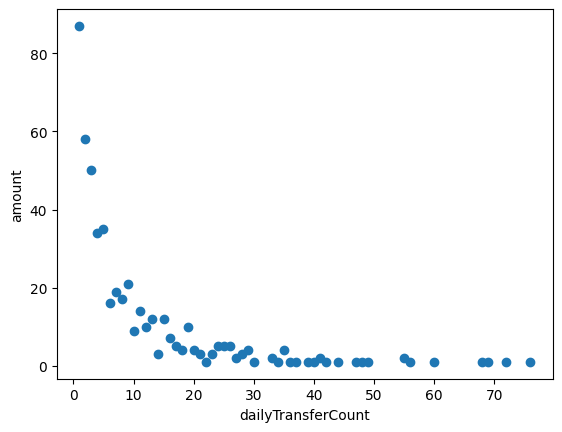

In [5]:
plt.scatter(df2['dailyTransferCount'], df2['amount'])
plt.ylabel("amount")
plt.xlabel("dailyTransferCount")
plt.show() 

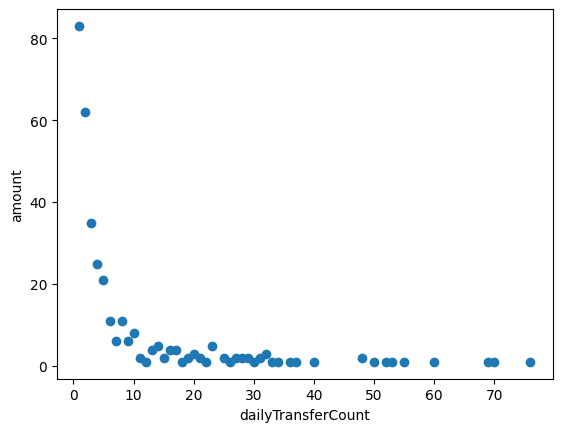

In [15]:
plt.scatter(df2['dailyTransferCount'], df2['amount'])
plt.ylabel("amount")
plt.xlabel("dailyTransferCount")
plt.show() 

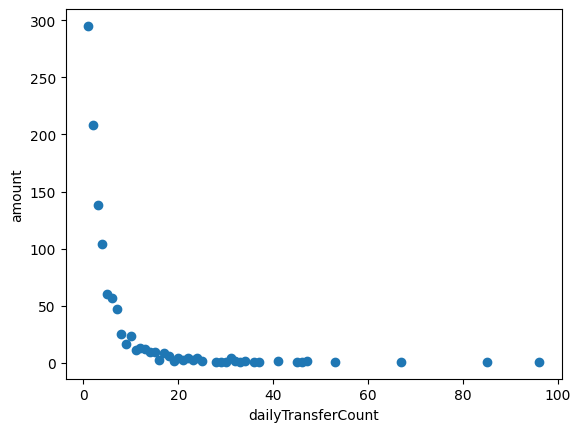

In [10]:
plt.scatter(df2['dailyTransferCount'], df2['amount'])
plt.ylabel("amount")
plt.xlabel("dailyTransferCount")
plt.show() 

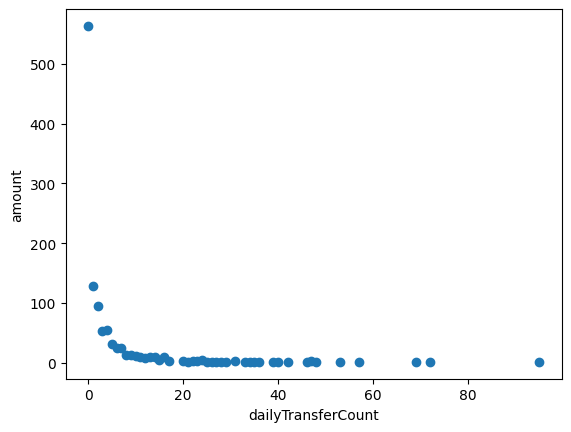

In [5]:
plt.scatter(df2['dailyTransferCount'], df2['amount'])
plt.ylabel("amount")
plt.xlabel("dailyTransferCount")
plt.show() 